In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# Prediction using single parameter

In [3]:
df= pd.read_excel("house price.xlsx")

In [4]:
df

,area,price
0,1200,200000
1,1300,250000
2,1500,420000
3,2000,500000
4,2150,512000


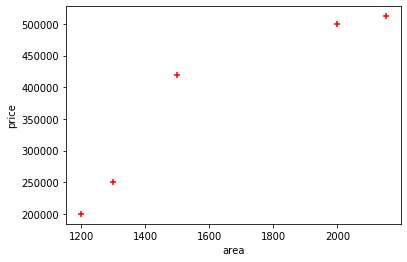

In [10]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker="+")

In [13]:
reg=linear_model.LinearRegression()

In [15]:
reg.fit(df[['area']],df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
reg.predict([[1222]])

array([246760.55710306])

In [19]:
reg.coef_ #show the value of coffeicient

array([317.74373259])

In [20]:
reg.intercept_ #intercept value

-141522.28412256256

In [29]:
1222*317.74373259+(-141522.28412256256)

246760.5571024174

In [32]:
df=pd.read_excel("data.xlsx")

In [33]:
df

,area
0,2000
1,2200
2,4000
3,3300
4,2330
5,43322
6,4355
7,67565
8,45665
9,67867


In [35]:
p= reg.predict(df)

In [36]:
df["prices"] = p

In [37]:
df

,area,prices
0,2000,4.939652e+05
1,2200,5.575139e+05
2,4000,1.129453e+06
3,3300,9.070320e+05
4,2330,5.988206e+05
5,43322,1.362377e+07
6,4355,1.242252e+06
7,67565,2.132683e+07
8,45665,1.436825e+07
9,67867,2.142279e+07


In [38]:
df.to_csv

<bound method NDFrame.to_csv of       area        prices
0     2000  4.939652e+05
1     2200  5.575139e+05
2     4000  1.129453e+06
3     3300  9.070320e+05
4     2330  5.988206e+05
5    43322  1.362377e+07
6     4355  1.242252e+06
7    67565  2.132683e+07
8    45665  1.436825e+07
9    67867  2.142279e+07
10  567567  1.801993e+08>

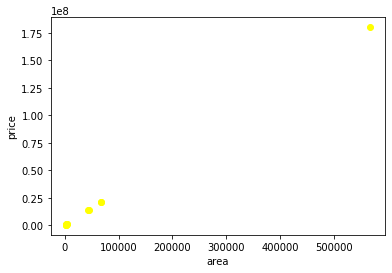

In [39]:
plt.xlabel("area")
plt.ylabel('price')
plt.scatter(df['area'],df['prices'],color='yellow')

# Prediciton Using Multiple Parameters

In [40]:
df=pd.read_csv("homeprices.csv")

In [41]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [45]:
m=df['bedrooms'].median()

In [56]:
df['bedrooms']=df.bedrooms.fillna(m) #Removing the NaN value
    

In [66]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [68]:
reg=linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df['price']) #training your model 1st; input independent variable the dependent

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
reg.coef_ #thes are the different m values

array([  112.06244194, 23388.88007794, -3231.71790863])

In [72]:
reg.intercept_ #this is the b value

221323.00186540425

In [75]:
reg.predict([[3000,4,15]])

array([602590.07937407])

# DEaling with Strings or Nominal data using one hot encoding 

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/homeprices.csv")

In [3]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [7]:
dummies=pd.get_dummies(df.town) #pandas has get_dummies methods to get dommy data for encoding

In [8]:
type(dummies)

pandas.core.frame.DataFrame

In [12]:
merged_df=pd.concat([df,dummies],axis='columns') #merging the data frames

In [13]:
merged_df

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [14]:
merged_df=merged_df.drop('town',axis=1)

In [15]:
merged_df

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [19]:
merged_df=merged_df.drop('monroe township', axis='columns') #dummy variable trap removes

KeyError: "['monroe township'] not found in axis"

In [20]:
merged_df

,area,price,robinsville,west windsor
0,2600,550000,0,0
1,3000,565000,0,0
2,3200,610000,0,0
3,3600,680000,0,0
4,4000,725000,0,0
5,2600,585000,0,1
6,2800,615000,0,1
7,3300,650000,0,1
8,3600,710000,0,1
9,2600,575000,1,0


In [23]:
model=linear_model.LinearRegression()

In [26]:
x=merged_df.drop('price',axis='columns')

In [29]:
x

,area,robinsville,west windsor
0,2600,0,0
1,3000,0,0
2,3200,0,0
3,3600,0,0
4,4000,0,0
5,2600,0,1
6,2800,0,1
7,3300,0,1
8,3600,0,1
9,2600,1,0


In [30]:
y=merged_df.price

In [31]:
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [32]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
model.predict([[2800,0,1]])

array([605103.20361213])

In [34]:
model.score(x,y) #your model has 95% accuracy

0.9573929037221871

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [36]:
dfle=df

In [39]:
dfle.town=le.fit_transform(dfle.town)

In [41]:
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [42]:
x = df[['town','area']].values 

In [43]:
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [44]:
y=dfle.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [45]:
from sklearn.preprocessing import  OneHotEncoder #another method for one hot encoding using sklearn

In [47]:
one=OneHotEncoder(categorical_features=[0])

In [48]:
x=one.fit_transform(x).toarray()
x

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [49]:
x=x[:,1:]
x

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [50]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
model.predict([[1,0,2000]])

array([489257.68651902])